# <center><font color="green"> https://bit.ly/ptpjb-2021-12</font></center>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/ptpjb-2021-12)

# <center><font color="blue">12 - Advanced prediction in Machine Learning</font></center>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue"> Outline: Model Klasifikasi Lanjutan</font></center>

* Support Vector Machines
* Evaluasi revisited: Underfitting & Overfitting
* Pipelining & Parameter Optimization
* Proper Model Selection
* Ensemble Learning
* Imbalance Learning
* Studi Kasus

<img src="images/meme-cartoon/meme model on train and test data.jpg" height="250" />

In [ ]:
!pip install --upgrade pandas

In [1]:
# Loading Modules
import warnings; warnings.simplefilter('ignore')
import pickle
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import svm, preprocessing
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
from tqdm import tqdm
sns.set(style="ticks", color_codes=True)
print(pd.__version__)
"Done"

1.3.2


'Done'

In [2]:
# Mulai dengan Load Data dari Modul sebelumnya terlebih dahulu
file_ = "data/data_Module-11.pckl"
try: # Running Locally, yakinkan "file_" berada di folder "data"
    f = open(file_, 'rb')
    data = pickle.load(f); f.close()
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/{file_}
    f = open(file_, 'rb')
    data = pickle.load(f); f.close()

df_, df1, y1, df2A, df2B, y2 = data
df_.shape, df_.keys()

((10, 5),
 Index(['kNN', 'RegLog', 'NaiveBys', 'DecTree', 'Forest'], dtype='object'))

In [3]:
# Akan sama dengan module sebelumnya karena nilai SEED sama.
df1_train, df1_test, y1_train, y1_test = train_test_split(df1, y1, test_size=0.3, random_state=33)
df2A_train, df2A_test, y2_train, y2_test = train_test_split(df2A, y2, test_size=0.3, random_state=33) #No One-Hot
df2B_train, df2B_test, y2_train, y2_test = train_test_split(df2B, y2, test_size=0.3, random_state=33) # One-Hot
"Done"

'Done'

# <center><font color="blue">Support Vector Machine (SVM)</font></center>

Misal data dinyatakan sebagai berikut:
$\{(\bar{x}_1,y_1),...,(\bar{x}_n,y_n)\}$, dimana $\bar{x}_i$ adalah
input pattern untuk data ke $i^{th}$ dan $y_i$ adalah nilai target yang diinginkan. Kategori
(class) direpresentasikan dengan $y_i=\{-1,1\}$. Sebuah **bidang datar (hyperplane)** yang memisahkan kedua kelas ini ("linearly separable") adalah:
$$ \bar{w}'\bar{x} + b=0 $$
dimana $\bar{x}$ adalah input vector (prediktor), $\bar{w}$ weight, dan $b$ disebut sebagai bias.

<p><img src="images/Pemodelan_SVM_.png" alt="" width="334" height="360" /></p>

# <center><font color="blue">Kelebihan Pemodelan SVM</font></center>

<img alt="" src="images/hard_margin_svm.png" style="width: 400px; height: 181px;" />

# <center><font color="blue">Support Vector Machine: Soft Margin</font></center>
<p><img style="undefined: undefined;" src="images/6_SVM.jpg" alt="" /> <img style="undefined: undefined;" src="images/svm_opt.png" alt="" width="461" height="163" /></p>
<ul>
<li>Diselesaikan dengan "mudah" via linear/quadratic programming.</li>
<li>Fungsi ini **Convex** sehingga penyelesaiannya menghasilkan nilai Global Optimal.</li>
</ul>

* **Interpretasi**: Recursive Feature Elimination (RFE) method melihat bentuk kuadrat dari setiap komponen *w* (higher better).

# <center><font color="blue">SVM Kernel (trick): $R^m \rightarrow R^n, n\geq m$</font></center>

<p><img alt="" src="images/6_SVM_Kernel.jpg" style="height:168px; width:306px" /></p>

# <center><font color="blue">Contoh Fungsi Kernel</font></center>

* Misal x = (x1, x2, x3); y = (y1, y2, y3). 
* dan fungsi pemetaan variabelnya f(x) = (x1², x1x2, x1x3, x2x1, x2², x2x3, x3x1, x3x2, x3²), 
* maka kernelnya adalah K(x, y ) = <f(x), f(y)> = <x, y>².
* Contoh numerik misal x = (1, 2, 3) dan y = (4, 5, 6). maka:
* f(x) = (1, 2, 3, 2, 4, 6, 3, 6, 9) <br> f(y) = (16, 20, 24, 20, 25, 30, 24, 30, 36)
* <f(x), f(y)> = 16 + 40 + 72 + 40 + 100+ 180 + 72 + 180 + 324 = 1024
* complicated!... **Menggunakan fungsi kernel perhitungannya bisa disederhanakan**:
* K(x, y) = (4 + 10 + 18)² = 32² = 1024
* Artinya perhitungan di dimensi yang tinggi dapat dilakukan di dimensi satu via inner product!.

# <center><font color="blue">Contoh Fungsi Kernel yang Populer</font></center>

<p><img alt="" src="images/Well-Known_Kernels.png" style="width: 400px; height: 208px;" /></p>

# <center><font color="blue">Kelebihan dan Kekurangan SVM</font></center>

<p><b>Pros</b></p>

<ul>
	<li>Akurasinya Baik</li>
	<li>Bekerja dengan baik untuk sampel data yang relatif kecil</li>
	<li>Hanya bergantung pada SV ==&gt; meningkatkan efisiensi</li>
	<li>Convex ==&gt; Minimum Global ==&gt; Pasti Konvergen</li>
</ul>

<p><b>Cons</b></p>

<ul>
	<li>Tidak efisien untuk data yang besar</li>
	<li>Akurasi terkadang rendah untuk multiklasifikasi (sulit mendapatkan hubungan antar kategori di modelnya)</li>
	<li>Tidak robust terhadap noise</li>
</ul>

Bacaan lebih lanjut:
* https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
* Contoh Perhitungan Manual: https://slideplayer.info/slide/3672979/?fbclid=IwAR3Tteg_PbKwkBxV63FGfat3o9UBfHBnjvGHwlyYcrxKTWeb6gfsSpBAQBE


In [4]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')#Misal menggunakan kernel Linear

dSVM.fit(df1_train, y1_train)
y_SVM1 = dSVM.predict(df1_test)

print(confusion_matrix(y1_test, y_SVM1))
print(classification_report(y1_test, y_SVM1))

[[11  0  0]
 [ 0 15  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [5]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [14 41 83  0 12 80 93 15 18 31 42 43 88]
Vector Datanya: 
 [[4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.1 3.3 1.7 0.5]
 [5.1 2.5 3.  1.1]
 [5.9 3.2 4.8 1.8]
 [6.  2.7 5.1 1.6]
 [6.7 3.  5.  1.7]
 [6.3 2.8 5.1 1.5]
 [7.2 3.  5.8 1.6]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.3 2.7 4.9 1.8]
 [4.9 2.5 4.5 1.7]]


In [6]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[-0.04630589  0.52106895 -1.00301941 -0.46411937]
 [ 0.04017805  0.17410509 -0.55713561 -0.2437469 ]
 [ 3.71728255  3.70419394 -7.34998011 -8.65276999]]
b =  [ 1.45332688  1.28948112 17.22405187]


In [7]:
# Menggunakan Kernel: http://scikit-learn.org/stable/modules/svm.html#svm-kernels
for kernel in ('sigmoid', 'poly', 'rbf', 'linear'):
    dSVM = svm.SVC(kernel=kernel)
    dSVM.fit(df1_train, y1_train)
    y_SVM = dSVM.predict(df1_test)
    print(accuracy_score(y1_test, y_SVM))

0.24444444444444444
0.9777777777777777
0.9333333333333333
0.9555555555555556


In [8]:
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
mulai = time.time()
scores_svm = cross_val_score(dSVM, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy SVM: 0.98 (+/- 0.09), Waktu = 0.671 detik


kNN         0.866667
RegLog      0.933333
NaiveBys    0.866667
DecTree     0.866667
Forest      0.866667
SVM         0.866667
dtype: float64

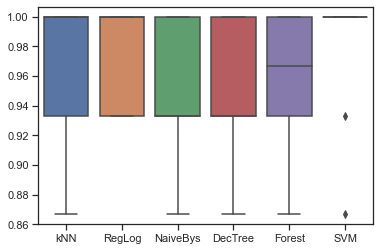

In [9]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_['SVM'] = scores_svm
p = sns.boxplot(data = df_)
df_.min()

# <center><font color="blue">Induktif Bias</font></center>

<ul>
	<li>Bias penaksiran parameter (statistik)</li>
	<li>Induktif Bias Sample (Machine Learning - Tom Mitchel)</li>
	<li>Induktif Bias Pemilihan Classifier (Statistical Learning Theory - Vapnik)</li>
</ul>
<img alt="" src="images/inductive_biases_.png" style="width: 600px; height: 153px;" />

<img alt="" src="images/class.png" />

# <center><font color="blue">(Hyper)Parameter Optimization</font></center>

* Perbandingan yang baru saja kita lakukan walau sudah CV, namun belum sepenuhnya valid.
* Saat membandingkan model, maka kita harus meyakinkan seluruh model mendapatkan parameternya yang optimal.

<img alt="" src="images/hyper-parameter_tunning.png" />

In [10]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
file = 'data/diabetes_data.csv'

try:
    # Local jupyter notebook, assuming "file" is in the "data" directory
    data = pd.read_csv(file, names=names)
except:
    # it's a google colab... create folder data and then download the file from github
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/{file}
    data = pd.read_csv(file, names=names)
    
print(data.shape, set(data['class']))
data.sample(5)

(768, 9) {0, 1}


,preg,plas,pres,skin,test,mass,pedi,age,class
716,3,173,78,39,185,33.8,0.970,31,1
483,0,84,82,31,125,38.2,0.233,23,0
98,6,93,50,30,64,28.7,0.356,23,0
48,7,103,66,32,0,39.1,0.344,31,1
595,0,188,82,14,185,32.0,0.682,22,1


In [11]:
# Split Train-Test

X = data.values[:,:8]  # Slice data (perhatikan disini struktur data adalah Numpy Array)
Y = data.values[:,8]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=99)

print(set(Y), x_train.shape, x_test.shape, sep=', ')

{0.0, 1.0}, (614, 8), (154, 8)


# <center><font color="blue">Kita Jalankan Terlebih Dahulu dengan "Default Parameter"</font></center>

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:09<00:00,  1.53s/it]


Regresi Logistik [0.6290322580645161, 0.8225806451612904, 0.7741935483870968, 0.7096774193548387]
k-NN [0.6935483870967742, 0.6935483870967742, 0.7258064516129032, 0.5967741935483871]
Naive Bayes [0.7096774193548387, 0.8387096774193549, 0.6774193548387096, 0.7580645161290323]
Decision Tree [0.6290322580645161, 0.7419354838709677, 0.6935483870967742, 0.7580645161290323]
Random Forest [0.7258064516129032, 0.8064516129032258, 0.7258064516129032, 0.7419354838709677]
SVM [0.7096774193548387, 0.7903225806451613, 0.6935483870967742, 0.7258064516129032]


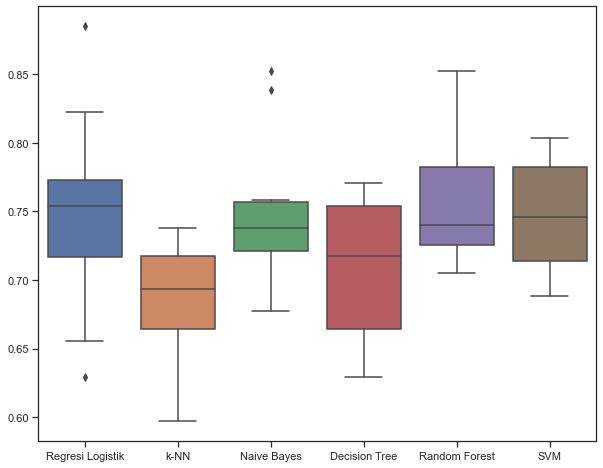

In [12]:
clf = LogisticRegression(solver='liblinear')
kNN = neighbors.KNeighborsClassifier()
gnb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_ = svm.SVC()

Models = [('Regresi Logistik', clf), ('k-NN',kNN), ('Naive Bayes',gnb), ('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm_)]
Scores = {}
for model_name, model in tqdm(Models):
    Scores[model_name] = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt, ax=ax)
for m, s in Scores.items():
    print(m, list(s)[:4])

# <center><font color="blue">Hyperparameter Optimization</font></center>

<ul>
<li>Misal akan dicontohkan dua algoritma (model) yang sudah kita bahas sebelumnya: k-NN dan SVM</li>
<li>Sebagai latihan silahkan untuk mencoba HO pada model yang lain.</li>
<li>Parameter tiap model di ML berbeda-beda dan nilai optimalnya berbeda pada setiap kasus.</li>
</ul>
<p><img src="images/rand_grid_search.png" alt="" width="811" height="406" /></p>

<img alt="" src="images/grid_search_workflow.png" />

In [13]:
# Hyperparameter optimization pada model kNN menggunakan gridCV
kCV = 10
metric = 'accuracy'
params = {}
params['kneighborsclassifier__n_neighbors'] = [1, 3, 5, 10, 15, 20, 25, 30]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(neighbors.KNeighborsClassifier())
optKnn = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-2) #
optKnn.fit(x_train, y_train)
print(optKnn.best_score_)
print(optKnn.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
0.7297726070861978
{'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'uniform'}


In [14]:
# Contoh Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.
pipeSVM = make_pipeline(svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'verbose']


In [15]:
# Optimal parameter SVM dengan RandomizedSearch
# WARNING cell ini butuh waktu komputasi cukup lama
kCV = 10
paramsSVM = {}
paramsSVM['svc__C'] = [1, 10, 100, 1000] #sp.stats.uniform(scale=100)
paramsSVM['svc__gamma'] = [0.1, 0.001, 0.0001, 1, 10]
paramsSVM['svc__kernel'] = ['rbf', 'sigmoid', 'linear'] # , 'poly'
optSvm = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=2, n_jobs=-2) # refit=True, pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
optSvm.fit(x_train, y_train)
print(optSvm.best_score_)
print(optSvm.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.7573241671073505
{'svc__kernel': 'linear', 'svc__gamma': 1, 'svc__C': 10}


# Model Selection

<img alt="" src="images/model_selection.png" />

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:   12.9s remaining:    3.2s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:   13.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   8 out of  10 | elapsed:   23.7s remaining:    5.9s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:   35.1s finished


Accuracy kNN: 0.71 (+/- 0.17)
Accuracy SVM: 0.78 (+/- 0.20)


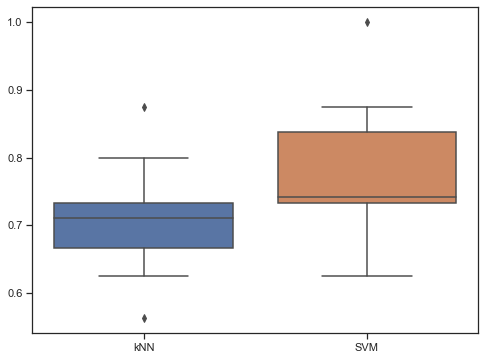

In [27]:
kCV = 10
# Menggunakan parameter optimal
kNN = neighbors.KNeighborsClassifier(n_neighbors= 20, weights= 'uniform')
svm_ = svm.SVC(kernel= 'linear', gamma= 10, C= 10)

# Melakukan Cross Validasi
models = ['kNN', 'SVM']
knn_score = cross_val_score(kNN, x_test, y_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(svm_, x_test, y_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
scores = [knn_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

# <center><font color="blue">Ensemble Model</font></center>

<ul>
	<li>What? a learning algorithms that construct a set of classifiers and then classify new data points by taking a (weighted) vote of their predictions.</li>
	<li>Why? Better prediction, More stable model</li>
	<li>How? Bagging &amp; Boosting</li>
</ul>
<img alt="" src="images/Ensemble.png" style="width: 500px; height: 213px;" />

# <center><font color="blue">“meta-algorithms” : Bagging & Boosting</font></center>

<p><img style="undefined: undefined;" src="images/Bagging_VS_Boosting.png" alt="" width="911" height="337" /></p>

* Ensemble https://www.youtube.com/watch?v=Un9zObFjBH0 
* Bagging https://www.youtube.com/watch?v=2Mg8QD0F1dQ 
* Boosting https://www.youtube.com/watch?v=GM3CDQfQ4sw

# <center><font color="blue">Boosting in ML</font></center>

<center><video controls src="videos/Boosting.mp4"/></center>

# <center><font color="blue">Property of Boosting</font></center>
<img alt="" src="images/Bagging-Boosting_Usage.png" style="width: 500px; height: 281px;" />

# <center><font color="blue">AdaBoost</font></center>
<ul>
	<li><a href="https://youtu.be/BoGNyWW9-mE?t=70" target="_blank">https://youtu.be/BoGNyWW9-mE?t=70</a></li>
</ul>
<img alt="" src="images/AdaBoost.png" style="width: 400px; height: 332px;" />

In [17]:
# Contoh Voting (Bagging) di Python
# Catatan : Random Forest termasuk Bagging Ensemble (walau modified)
# Best practicenya Model yang di ensemble semuanya menggunakan Optimal Parameter

kNN = neighbors.KNeighborsClassifier(3)
kNN.fit(x_train, y_train)
Y_kNN = kNN.score(x_test, y_test)

DT = tree.DecisionTreeClassifier(random_state=1)
DT.fit(x_train, y_train)
Y_DT = DT.score(x_test, y_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(x_train,y_train)
Y_Vot = model.score(x_test,y_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Votting', Y_Vot)

Akurasi k-NN 0.7142857142857143
Akurasi Decision Tree 0.6818181818181818
Akurasi Votting 0.7337662337662337


In [18]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi), 
# tapi kita pakai probabilitas dari setiap kategori
T = tree.DecisionTreeClassifier()
K = neighbors.KNeighborsClassifier()
R = LogisticRegression()

T.fit(x_train,y_train)
K.fit(x_train,y_train)
R.fit(x_train,y_train)

y_T=T.predict_proba(x_test)
y_K=K.predict_proba(x_test)
y_R=R.predict_proba(x_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(y_test, prediction))

[[0.86747711 0.13252289]
 [0.9656968  0.0343032 ]
 [0.90409449 0.09590551]
 [0.81735196 0.18264804]
 [0.97683242 0.02316758]]
[0, 0, 0, 0, 0]
Akurasi Averaging 0.7402597402597403


In [19]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=33)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7421565276828435


# <center><font color="blue">Imbalance Data</font></center>

* Metric Trap
* Akurasi kategori tertentu lebih penting
* Contoh kasus
<img alt="" src="images/imbalance.png" />

# <center><font color="blue">Imbalance Learning</font></center>

<img alt="" src="images/under-over-sampling.png" style="width: 500px; height: 147px;" />

* Undersampling, Oversampling, Model Based (weight adjustment)
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
* Plot perbandingan: https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py

In [20]:
Counter(Y)

Counter({1.0: 268, 0.0: 500})

In [21]:
# fit the model and get the separating hyperplane using weighted classes

svm_ = svm.SVC(kernel='linear')
svm_.fit(x_train, y_train)
y_SVMib = svm_.predict(x_test)

print(confusion_matrix(y_test, y_SVMib))
print(classification_report(y_test, y_SVMib))

[[93 12]
 [19 30]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       105
         1.0       0.71      0.61      0.66        49

    accuracy                           0.80       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154



In [22]:
# fit the model and get the separating hyperplane using weighted classes
# x_train, x_test, y_train, y_test

svm_balanced = svm.SVC(kernel='linear', class_weight={1: 3}) #WEIGHTED SVM
svm_balanced.fit(x_train, y_train)
y_SVMb = svm_balanced.predict(x_test)

print(confusion_matrix(y_test, y_SVMb))
print(classification_report(y_test, y_SVMb))

[[67 38]
 [ 7 42]]
              precision    recall  f1-score   support

         0.0       0.91      0.64      0.75       105
         1.0       0.53      0.86      0.65        49

    accuracy                           0.71       154
   macro avg       0.72      0.75      0.70       154
weighted avg       0.78      0.71      0.72       154



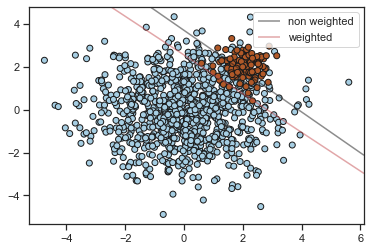

In [23]:
# Example of model-based imbalance treatment - SVM
from sklearn.datasets import make_blobs
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],centers=centers,cluster_std=clusters_std,random_state=33, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) #WEIGHTED SVM
wclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')# plot the samples
ax = plt.gca()# plot the decision functions for both classifiers
xlim = ax.get_xlim(); ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)# create grid to evaluate model
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-']) # plot decision boundary and margins
Z = wclf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])# plot decision boundary and margins for weighted classes
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

# <center><font color="blue">Weighted Decision Tree</font></center>

In [24]:
T = tree.DecisionTreeClassifier(random_state = 33)
T.fit(x_train,y_train)
y_DT = T.predict(x_test)
print('Akurasi  (Decision tree Biasa) = ', accuracy_score(y_test, y_DT))
print(classification_report(y_test, y_DT))

T = tree.DecisionTreeClassifier(class_weight = 'balanced', random_state = 33)
T.fit(x_train, y_train)
y_DT = T.predict(x_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(y_test, y_DT))
print(classification_report(y_test, y_DT))

Akurasi  (Decision tree Biasa) =  0.6883116883116883
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76       105
         1.0       0.51      0.59      0.55        49

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.70      0.69      0.69       154

Akurasi  (Weighted Decision tree) =  0.7012987012987013
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77       105
         1.0       0.52      0.65      0.58        49

    accuracy                           0.70       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.72      0.70      0.71       154



# <center><font color="blue"> Studi Kasus (Latihan) ENB2012: Prediksi Penggunaan Energi Gedung</font></center>

<img src="images/buildings-by-calibrated-simulation.png" alt="" width="503" height="377" />

# <font color="green"> Task</font></center>

* Filter data EcoTest dan pilih hanya yang kategori di variabel target muncul min 10 kali (heat-cat)
* Lakukan EDA (Preprocessing dan visualisasi dasar)
* Tentukan model terbaik (dengan parameter optimal dan cross validasi)
* Hati-hati Naive Bayes, Decision Tree dan Random Forest tidak memerlukan one-hot encoding.
* Gunakan Metric Micro F1-Score untuk menentukan model terbaiknya.

# <font color="green">Optional</font></center>
* Coba bandingkan model terbaik diatas dengan model ensemble.
* Apakah ada imbalance problem, coba atasi dengan over/under sampling.

In [25]:
file_ = "data/building-energy-efficiency-ENB2012_data.csv"

try: # Running Locally, yakinkan "file_" berada di folder "data"
    data = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/ptpjb/master/{file_}
    data = pd.read_csv(file_, error_bad_lines=False, low_memory = False, encoding='utf8')
print(data.shape)
data.sample(5)

(768, 12)


,compactness,surface-area,wall-area,roof-area,overall-height,orientation,glazing-area,glazing-dist,heating-load,cooling-load,heat-cat,cool-cat
309,0.76,661.5,416.5,122.50,7.0,3,0.25,1,36.13,37.58,36,37
380,0.62,808.5,367.5,220.50,3.5,2,0.25,2,14.34,15.32,14,15
48,0.98,514.5,294.0,110.25,7.0,2,0.10,1,24.58,26.47,24,26
426,0.64,784.0,343.0,220.50,3.5,4,0.25,3,16.66,20.46,16,20
45,0.62,808.5,367.5,220.50,3.5,3,0.00,0,8.49,12.22,8,12


In [26]:
# Jawaban Latihan dimulai di cell ini


# <center><font color="blue"> Akhir Modul 12 - Model Klasifikasi Lanjutan</font></center>

<hr />
<img alt="" src="images/meme-cartoon/Meme Deep Learning SVM.jpg" style="height: 400px;"/>